In [1]:
import os
import re
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import time
from tsml_eval.publications.y2023.tsc_bakeoff.run_experiments import _set_bakeoff_classifier
import matplotlib.patches as mpatches


#---- Ensure cwd = root_directory
cwd = Path.cwd()
if cwd.name == "notebooks":
    os.chdir(cwd.parent)



#own module imports
from src.models.classifierWrapper import BakeoffClassifier
from src.data_handlers.basic_func import dataset_provider,dataset_overview, overview_of_bakeoff_cl
from src.dca.apply_dca import apply_label_errors, percentage_to_instance_converter
from src.dca.le_func import create_label_flip_trajectory, reconstruct_state_y_train, check_for_le_trajectory
from src.visuals.visualizations import visualize_acc_decr, visualize_trace_M, visualize_acc_decr_multiple
from src.current_experiment import Experiment

from src.data_handlers.data_processing import generate_master_df, unpack_and_interpolate, create_nested_df_from_exp_dict, extend_nested_df_with_properties
from src.data_handlers.data_processing import aggregate_accuracy_curvers_multiple, categorize_dataset_properties
from src.data_handlers.data_processing import DATASET_PROPERTIES, get_dataset_properties
from src.utils.metrics import METRIC_FUNCTIONS
from src.utils.utilizations import load_and_expand_yaml, get_frames_and_names, setup_logger


warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
plt.style.use(os.path.join(os.getcwd(), "configs", "visualisations.mplstyle"))
logger = setup_logger("Basic_Func_Logger")
logger.info("Custom-named logger active.")


[2025-12-02 18:31:25] INFO - Custom-named logger active.
[2025-12-02 18:31:25] INFO - Custom-named logger active.
[2025-12-02 18:31:25] INFO - apply_dca.py logger active
[2025-12-02 18:31:25] INFO - Custom-named logger active.


In [2]:
configuration = load_and_expand_yaml("experiments/experiment_Beef35.yaml")
configuration2 = load_and_expand_yaml("experiments/experiment_Car35.yaml")
configuration3 = load_and_expand_yaml("experiments/experiment_Coffee35.yaml")
configuration4 = load_and_expand_yaml("experiments/experiment_Rock35.yaml")
configuration5 = load_and_expand_yaml("experiments/experiment_13_3_50.yaml")

all_configurations = []
all_configurations.extend(configuration)
all_configurations.extend(configuration2)
all_configurations.extend(configuration3)
all_configurations.extend(configuration4)
all_configurations[0]

[2025-12-02 18:31:28] INFO - Loading and expanding YAML configuration from: experiments/experiment_Beef35.yaml
[2025-12-02 18:31:28] INFO - YAML configuration expanded into 35 configurations
[2025-12-02 18:31:28] INFO - Loading and expanding YAML configuration from: experiments/experiment_Car35.yaml
[2025-12-02 18:31:28] INFO - YAML configuration expanded into 35 configurations
[2025-12-02 18:31:28] INFO - Loading and expanding YAML configuration from: experiments/experiment_Coffee35.yaml
[2025-12-02 18:31:28] INFO - YAML configuration expanded into 35 configurations
[2025-12-02 18:31:28] INFO - Loading and expanding YAML configuration from: experiments/experiment_Rock35.yaml
[2025-12-02 18:31:28] INFO - YAML configuration expanded into 35 configurations
[2025-12-02 18:31:28] INFO - Loading and expanding YAML configuration from: experiments/experiment_13_3_50.yaml
[2025-12-02 18:31:28] INFO - YAML configuration expanded into 39 configurations


{'DATASET_NAME': 'Beef',
 'CLASSIFIER_NAME': '1NN-DTW',
 'REDUCTION_F': 1,
 'RANDOM_S': 0,
 'DCA': {'type': 'LabelErrors',
  'DoE_param': {'le_strategy': 'leV1',
   'p_vec': 'None',
   'random_seed': 0,
   'start': 0,
   'stop': 100,
   'step': 10}}}

In [3]:
experimental_dict = {}

for i_, exp_conf in enumerate(all_configurations):
    current_exp = Experiment(config=exp_conf, base_path="112UCRFolds", results_root="simulation_results")
    exp_name = "experiment_"+str(i_)
    current_exp.run_experiment()
    experimental_dict[exp_name]=[exp_conf, current_exp]

[2025-12-02 18:31:37] INFO - X_train             : (30, 1, 470)
[2025-12-02 18:31:37] INFO - y_train             : (30,)
[2025-12-02 18:31:37] INFO - X_test              : (30, 1, 470)
[2025-12-02 18:31:37] INFO - y_test              : (30,)
[2025-12-02 18:31:37] INFO - X_train_small       : (30, 1, 470)
[2025-12-02 18:31:37] INFO - y_train_small       : (30,)
[2025-12-02 18:31:37] INFO - X_test_small        : (30, 1, 470)
[2025-12-02 18:31:37] INFO - y_test_small        : (30,)
[2025-12-02 18:31:37] INFO - Initializing BakeoffClassifier with name: 1NN-DTW, random_state: 0
[2025-12-02 18:31:37] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:37] INFO - Initializing Exp with dataset: Beef, classifier: 1NN-DTW, strategy: LabelErrors
[2025-12-02 18:31:37] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 10}
[2025-12-02 18:31:37] INFO - Run Experiment
[202

Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:37] INFO - Initializing Exp with dataset: Beef, classifier: TSFresh, strategy: LabelErrors
[2025-12-02 18:31:37] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 10}
[2025-12-02 18:31:37] INFO - Run Experiment
[2025-12-02 18:31:37] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-12-02 18:31:37] INFO - requested_instance_step = 3.0 will be transformed into 3
[2025-12-02 18:31:37] INFO - requested_percentage_step = 10 % || transformed into 10.0 %
[2025-12-02 18:31:37] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-12-02 18:31:37] INFO - stop value is 100% --> set to number of instances
[2025-12-02 18:31:37] WARNING - Could not assign GPU: NVML Shared Library Not Found
[2025-12-02 18:31:37] INFO - label_names: ['1' '2' '3' '4' '5']
[2025-12-02 18:31:37] INFO - Current Label Error Strategy: DE

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:38] INFO - Run Experiment
[2025-12-02 18:31:38] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-12-02 18:31:38] INFO - requested_instance_step = 3.0 will be transformed into 3
[2025-12-02 18:31:38] INFO - requested_percentage_step = 10 % || transformed into 10.0 %
[2025-12-02 18:31:38] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-12-02 18:31:38] INFO - stop value is 100% --> set to number of instances
[2025-12-02 18:31:38] WARNING - Could not assign GPU: NVML Shared Library Not Found
[2025-12-02 18:31:38] INFO - label_names: ['1' '2' '3' '4' '5']
[2025-12-02 18:31:38] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-12-02 18:31:38] INFO - The p_vector for the current_experiment: [0.2, 0.2, 0.2, 0.2, 0.2]
[2025-12-02 18:31:38] INFO - Searching inside simulation_results/MRSQM/Beef for results
[2025-12-02 18:31:38] INFO - Looking for files matching pattern: leV1_0_(\d+)_(\d+)_(\d+) with 

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:38] INFO - ✅ Results loaded from: simulation_results/CIF/Beef/leV1_0_0_30_3
[2025-12-02 18:31:38] INFO - X_train             : (30, 1, 470)
[2025-12-02 18:31:38] INFO - y_train             : (30,)
[2025-12-02 18:31:38] INFO - X_test              : (30, 1, 470)
[2025-12-02 18:31:38] INFO - y_test              : (30,)
[2025-12-02 18:31:38] INFO - X_train_small       : (30, 1, 470)
[2025-12-02 18:31:38] INFO - y_train_small       : (30,)
[2025-12-02 18:31:38] INFO - X_test_small        : (30, 1, 470)
[2025-12-02 18:31:38] INFO - y_test_small        : (30,)
[2025-12-02 18:31:38] INFO - Initializing BakeoffClassifier with name: STSF, random_state: 0
[2025-12-02 18:31:38] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:38] INFO - Initializing Exp with dataset: Beef, classifier: STSF, strategy: LabelErrors
[2025-12-02 18:31:38] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 

Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:39] INFO - X_train             : (30, 1, 470)
[2025-12-02 18:31:39] INFO - y_train             : (30,)
[2025-12-02 18:31:39] INFO - X_test              : (30, 1, 470)
[2025-12-02 18:31:39] INFO - y_test              : (30,)
[2025-12-02 18:31:39] INFO - X_train_small       : (30, 1, 470)
[2025-12-02 18:31:39] INFO - y_train_small       : (30,)
[2025-12-02 18:31:39] INFO - X_test_small        : (30, 1, 470)
[2025-12-02 18:31:39] INFO - y_test_small        : (30,)
[2025-12-02 18:31:39] INFO - Initializing BakeoffClassifier with name: CBOSS, random_state: 0
[2025-12-02 18:31:39] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:39] INFO - Initializing Exp with dataset: Beef, classifier: CBOSS, strategy: LabelErrors
[2025-12-02 18:31:39] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 10}
[2025-12-02 18:31:39] INFO - Run Experiment
[2025-12

Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:39] INFO - Initializing Exp with dataset: Beef, classifier: ROCKET, strategy: LabelErrors
[2025-12-02 18:31:39] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 10}
[2025-12-02 18:31:39] INFO - Run Experiment
[2025-12-02 18:31:39] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-12-02 18:31:39] INFO - requested_instance_step = 3.0 will be transformed into 3
[2025-12-02 18:31:39] INFO - requested_percentage_step = 10 % || transformed into 10.0 %
[2025-12-02 18:31:39] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-12-02 18:31:39] INFO - stop value is 100% --> set to number of instances
[2025-12-02 18:31:39] WARNING - Could not assign GPU: NVML Shared Library Not Found
[2025-12-02 18:31:39] INFO - label_names: ['1' '2' '3' '4' '5']
[2025-12-02 18:31:39] INFO - Current Label Error Strategy: DEF

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:43] INFO - Initializing Exp with dataset: Beef, classifier: CNN, strategy: LabelErrors
[2025-12-02 18:31:43] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 10}
[2025-12-02 18:31:43] INFO - Run Experiment
[2025-12-02 18:31:43] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-12-02 18:31:43] INFO - requested_instance_step = 3.0 will be transformed into 3
[2025-12-02 18:31:43] INFO - requested_percentage_step = 10 % || transformed into 10.0 %
[2025-12-02 18:31:43] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-12-02 18:31:43] INFO - stop value is 100% --> set to number of instances
[2025-12-02 18:31:43] WARNING - Could not assign GPU: NVML Shared Library Not Found
[2025-12-02 18:31:43] INFO - label_names: ['1' '2' '3' '4' '5']
[2025-12-02 18:31:43] INFO - Current Label Error Strategy: DEFAUL

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:43] INFO - X_train             : (30, 1, 470)
[2025-12-02 18:31:43] INFO - y_train             : (30,)
[2025-12-02 18:31:43] INFO - X_test              : (30, 1, 470)
[2025-12-02 18:31:43] INFO - y_test              : (30,)
[2025-12-02 18:31:43] INFO - X_train_small       : (30, 1, 470)
[2025-12-02 18:31:43] INFO - y_train_small       : (30,)
[2025-12-02 18:31:43] INFO - X_test_small        : (30, 1, 470)
[2025-12-02 18:31:43] INFO - y_test_small        : (30,)
[2025-12-02 18:31:43] INFO - Initializing BakeoffClassifier with name: HC1, random_state: 0
[2025-12-02 18:31:43] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:43] INFO - Initializing Exp with dataset: Beef, classifier: HC1, strategy: LabelErrors
[2025-12-02 18:31:43] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 10}
[2025-12-02 18:31:43] INFO - Run Experiment
[2025-12-02 

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:43] INFO - X_train             : (60, 1, 577)
[2025-12-02 18:31:43] INFO - y_train             : (60,)
[2025-12-02 18:31:43] INFO - X_test              : (60, 1, 577)
[2025-12-02 18:31:43] INFO - y_test              : (60,)
[2025-12-02 18:31:43] INFO - X_train_small       : (60, 1, 577)
[2025-12-02 18:31:43] INFO - y_train_small       : (60,)
[2025-12-02 18:31:43] INFO - X_test_small        : (60, 1, 577)
[2025-12-02 18:31:43] INFO - y_test_small        : (60,)
[2025-12-02 18:31:43] INFO - Initializing BakeoffClassifier with name: TSFresh, random_state: 0
[2025-12-02 18:31:43] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:43] INFO - Initializing Exp with dataset: Car, classifier: TSFresh, strategy: LabelErrors
[2025-12-02 18:31:43] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 10}
[2025-12-02 18:31:43] INFO - Run Experiment
[2025

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:44] INFO - X_train             : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_train             : (60,)
[2025-12-02 18:31:44] INFO - X_test              : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_test              : (60,)
[2025-12-02 18:31:44] INFO - X_train_small       : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_train_small       : (60,)
[2025-12-02 18:31:44] INFO - X_test_small        : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_test_small        : (60,)
[2025-12-02 18:31:44] INFO - Initializing BakeoffClassifier with name: R-STSF, random_state: 0
[2025-12-02 18:31:44] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:44] INFO - Initializing Exp with dataset: Car, classifier: R-STSF, strategy: LabelErrors
[2025-12-02 18:31:44] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 10}
[2025-12-02 18:31:44] INFO - Run Experiment
[2025-1

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:44] INFO - ✅ Results loaded from: simulation_results/STSF/Car/leV1_0_0_60_6
[2025-12-02 18:31:44] INFO - X_train             : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_train             : (60,)
[2025-12-02 18:31:44] INFO - X_test              : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_test              : (60,)
[2025-12-02 18:31:44] INFO - X_train_small       : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_train_small       : (60,)
[2025-12-02 18:31:44] INFO - X_test_small        : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_test_small        : (60,)
[2025-12-02 18:31:44] INFO - Initializing BakeoffClassifier with name: DRCIF, random_state: 0
[2025-12-02 18:31:44] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:44] INFO - Initializing Exp with dataset: Car, classifier: DRCIF, strategy: LabelErrors
[2025-12-02 18:31:44] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed':

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:44] INFO - X_train             : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_train             : (60,)
[2025-12-02 18:31:44] INFO - X_test              : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_test              : (60,)
[2025-12-02 18:31:44] INFO - X_train_small       : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_train_small       : (60,)
[2025-12-02 18:31:44] INFO - X_test_small        : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_test_small        : (60,)
[2025-12-02 18:31:44] INFO - Initializing BakeoffClassifier with name: WEASEL-D, random_state: 0
[2025-12-02 18:31:44] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:44] INFO - Initializing Exp with dataset: Car, classifier: WEASEL-D, strategy: LabelErrors
[2025-12-02 18:31:44] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 10}
[2025-12-02 18:31:44] INFO - Run Experiment
[20

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:44] INFO - ✅ Results loaded from: simulation_results/Hydra/Car/leV1_0_0_60_6
[2025-12-02 18:31:44] INFO - X_train             : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_train             : (60,)
[2025-12-02 18:31:44] INFO - X_test              : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_test              : (60,)
[2025-12-02 18:31:44] INFO - X_train_small       : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_train_small       : (60,)
[2025-12-02 18:31:44] INFO - X_test_small        : (60, 1, 577)
[2025-12-02 18:31:44] INFO - y_test_small        : (60,)
[2025-12-02 18:31:44] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-12-02 18:31:44] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:44] INFO - Initializing Exp with dataset: Car, classifier: MR-Hydra, strategy: LabelErrors
[2025-12-02 18:31:44] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:45] INFO - X_train             : (60, 1, 577)
[2025-12-02 18:31:45] INFO - y_train             : (60,)
[2025-12-02 18:31:45] INFO - X_test              : (60, 1, 577)
[2025-12-02 18:31:45] INFO - y_test              : (60,)
[2025-12-02 18:31:45] INFO - X_train_small       : (60, 1, 577)
[2025-12-02 18:31:45] INFO - y_train_small       : (60,)
[2025-12-02 18:31:45] INFO - X_test_small        : (60, 1, 577)
[2025-12-02 18:31:45] INFO - y_test_small        : (60,)
[2025-12-02 18:31:45] INFO - Initializing BakeoffClassifier with name: LITETime, random_state: 0
[2025-12-02 18:31:45] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:45] INFO - Initializing Exp with dataset: Car, classifier: LITETime, strategy: LabelErrors
[2025-12-02 18:31:45] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 10}
[2025-12-02 18:31:45] INFO - Run Experiment
[20

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:45] INFO - 📁 Found directories: ['leV1_0_0_28_1', 'leV1_0_0_28_3']
[2025-12-02 18:31:45] INFO - 🟡 Partial Match found: leV1_0_0_28_1
[2025-12-02 18:31:45] INFO - ✅ Exact match found: leV1_0_0_28_3
[2025-12-02 18:31:45] INFO - Loading existing trajectory from simulation_results/label_errors/Coffee/leV1/Coffee_le_traj.parquet
[2025-12-02 18:31:45] INFO - ✅ Results loaded from: simulation_results/Catch22/Coffee/leV1_0_0_28_3
[2025-12-02 18:31:45] INFO - X_train             : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_train             : (28,)
[2025-12-02 18:31:45] INFO - X_test              : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_test              : (28,)
[2025-12-02 18:31:45] INFO - X_train_small       : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_train_small       : (28,)
[2025-12-02 18:31:45] INFO - X_test_small        : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_test_small        : (28,)
[2025-12-02 18:31:45] INFO - Initializing BakeoffClassifier with name: T

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:45] INFO - X_train             : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_train             : (28,)
[2025-12-02 18:31:45] INFO - X_test              : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_test              : (28,)
[2025-12-02 18:31:45] INFO - X_train_small       : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_train_small       : (28,)
[2025-12-02 18:31:45] INFO - X_test_small        : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_test_small        : (28,)
[2025-12-02 18:31:45] INFO - Initializing BakeoffClassifier with name: RISE, random_state: 0
[2025-12-02 18:31:45] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:45] INFO - Initializing Exp with dataset: Coffee, classifier: RISE, strategy: LabelErrors
[2025-12-02 18:31:45] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 10}
[2025-12-02 18:31:45] INFO - Run Experiment
[2025-12

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:45] INFO - Loading existing trajectory from simulation_results/label_errors/Coffee/leV1/Coffee_le_traj.parquet
[2025-12-02 18:31:45] INFO - ✅ Results loaded from: simulation_results/BOSS/Coffee/leV1_0_0_28_3
[2025-12-02 18:31:45] INFO - X_train             : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_train             : (28,)
[2025-12-02 18:31:45] INFO - X_test              : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_test              : (28,)
[2025-12-02 18:31:45] INFO - X_train_small       : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_train_small       : (28,)
[2025-12-02 18:31:45] INFO - X_test_small        : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_test_small        : (28,)
[2025-12-02 18:31:45] INFO - Initializing BakeoffClassifier with name: CBOSS, random_state: 0
[2025-12-02 18:31:45] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:45] INFO - Initializing Exp with dataset: Coffee, classifier: CBOSS, strategy: LabelErrors
[2025-

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:45] INFO - X_train             : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_train             : (28,)
[2025-12-02 18:31:45] INFO - X_test              : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_test              : (28,)
[2025-12-02 18:31:45] INFO - X_train_small       : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_train_small       : (28,)
[2025-12-02 18:31:45] INFO - X_test_small        : (28, 1, 286)
[2025-12-02 18:31:45] INFO - y_test_small        : (28,)
[2025-12-02 18:31:45] INFO - Initializing BakeoffClassifier with name: Arsenal, random_state: 0
[2025-12-02 18:31:45] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:45] INFO - Initializing Exp with dataset: Coffee, classifier: Arsenal, strategy: LabelErrors
[2025-12-02 18:31:45] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 10}
[2025-12-02 18:31:45] INFO - Run Experiment
[2

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:46] INFO - X_train             : (28, 1, 286)
[2025-12-02 18:31:46] INFO - y_train             : (28,)
[2025-12-02 18:31:46] INFO - X_test              : (28, 1, 286)
[2025-12-02 18:31:46] INFO - y_test              : (28,)
[2025-12-02 18:31:46] INFO - X_train_small       : (28, 1, 286)
[2025-12-02 18:31:46] INFO - y_train_small       : (28,)
[2025-12-02 18:31:46] INFO - X_test_small        : (28, 1, 286)
[2025-12-02 18:31:46] INFO - y_test_small        : (28,)
[2025-12-02 18:31:46] INFO - Initializing BakeoffClassifier with name: LITETime, random_state: 0
[2025-12-02 18:31:46] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:46] INFO - Initializing Exp with dataset: Coffee, classifier: LITETime, strategy: LabelErrors
[2025-12-02 18:31:46] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 10}
[2025-12-02 18:31:46] INFO - Run Experiment


Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:46] INFO - X_train             : (20, 1, 2844)
[2025-12-02 18:31:46] INFO - y_train             : (20,)
[2025-12-02 18:31:46] INFO - X_test              : (50, 1, 2844)
[2025-12-02 18:31:46] INFO - y_test              : (50,)
[2025-12-02 18:31:46] INFO - X_train_small       : (20, 1, 2844)
[2025-12-02 18:31:46] INFO - y_train_small       : (20,)
[2025-12-02 18:31:46] INFO - X_test_small        : (50, 1, 2844)
[2025-12-02 18:31:46] INFO - y_test_small        : (50,)
[2025-12-02 18:31:46] INFO - Initializing BakeoffClassifier with name: GRAIL, random_state: 0
[2025-12-02 18:31:46] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:46] INFO - Initializing Exp with dataset: Rock, classifier: GRAIL, strategy: LabelErrors
[2025-12-02 18:31:46] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 50}
[2025-12-02 18:31:46] INFO - Run Experiment
[202

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:46] INFO - X_train             : (20, 1, 2844)
[2025-12-02 18:31:46] INFO - y_train             : (20,)
[2025-12-02 18:31:46] INFO - X_test              : (50, 1, 2844)
[2025-12-02 18:31:46] INFO - y_test              : (50,)
[2025-12-02 18:31:46] INFO - X_train_small       : (20, 1, 2844)
[2025-12-02 18:31:46] INFO - y_train_small       : (20,)
[2025-12-02 18:31:46] INFO - X_test_small        : (50, 1, 2844)
[2025-12-02 18:31:46] INFO - y_test_small        : (50,)
[2025-12-02 18:31:46] INFO - Initializing BakeoffClassifier with name: RDST, random_state: 0
[2025-12-02 18:31:46] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:46] INFO - Initializing Exp with dataset: Rock, classifier: RDST, strategy: LabelErrors
[2025-12-02 18:31:46] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 50}
[2025-12-02 18:31:46] INFO - Run Experiment
[2025-

Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:46] INFO - X_train             : (20, 1, 2844)
[2025-12-02 18:31:46] INFO - y_train             : (20,)
[2025-12-02 18:31:46] INFO - X_test              : (50, 1, 2844)
[2025-12-02 18:31:46] INFO - y_test              : (50,)
[2025-12-02 18:31:46] INFO - X_train_small       : (20, 1, 2844)
[2025-12-02 18:31:46] INFO - y_train_small       : (20,)
[2025-12-02 18:31:46] INFO - X_test_small        : (50, 1, 2844)
[2025-12-02 18:31:46] INFO - y_test_small        : (50,)
[2025-12-02 18:31:46] INFO - Initializing BakeoffClassifier with name: RISE, random_state: 0
[2025-12-02 18:31:46] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:46] INFO - Initializing Exp with dataset: Rock, classifier: RISE, strategy: LabelErrors
[2025-12-02 18:31:46] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 50}
[2025-12-02 18:31:46] INFO - Run Experiment
[2025-

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:47] INFO - X_train             : (20, 1, 2844)
[2025-12-02 18:31:47] INFO - y_train             : (20,)
[2025-12-02 18:31:47] INFO - X_test              : (50, 1, 2844)
[2025-12-02 18:31:47] INFO - y_test              : (50,)
[2025-12-02 18:31:47] INFO - X_train_small       : (20, 1, 2844)
[2025-12-02 18:31:47] INFO - y_train_small       : (20,)
[2025-12-02 18:31:47] INFO - X_test_small        : (50, 1, 2844)
[2025-12-02 18:31:47] INFO - y_test_small        : (50,)
[2025-12-02 18:31:47] INFO - Initializing BakeoffClassifier with name: QUANT, random_state: 0
[2025-12-02 18:31:47] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:47] INFO - Initializing Exp with dataset: Rock, classifier: QUANT, strategy: LabelErrors
[2025-12-02 18:31:47] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 50}
[2025-12-02 18:31:47] INFO - Run Experiment
[202

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:47] INFO - X_train             : (20, 1, 2844)
[2025-12-02 18:31:47] INFO - y_train             : (20,)
[2025-12-02 18:31:47] INFO - X_test              : (50, 1, 2844)
[2025-12-02 18:31:47] INFO - y_test              : (50,)
[2025-12-02 18:31:47] INFO - X_train_small       : (20, 1, 2844)
[2025-12-02 18:31:47] INFO - y_train_small       : (20,)
[2025-12-02 18:31:47] INFO - X_test_small        : (50, 1, 2844)
[2025-12-02 18:31:47] INFO - y_test_small        : (50,)
[2025-12-02 18:31:47] INFO - Initializing BakeoffClassifier with name: WEASEL-D, random_state: 0
[2025-12-02 18:31:47] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:47] INFO - Initializing Exp with dataset: Rock, classifier: WEASEL-D, strategy: LabelErrors
[2025-12-02 18:31:47] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 50}
[2025-12-02 18:31:47] INFO - Run Experimen

Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:47] INFO - X_train             : (20, 1, 2844)
[2025-12-02 18:31:47] INFO - y_train             : (20,)
[2025-12-02 18:31:47] INFO - X_test              : (50, 1, 2844)
[2025-12-02 18:31:47] INFO - y_test              : (50,)
[2025-12-02 18:31:47] INFO - X_train_small       : (20, 1, 2844)
[2025-12-02 18:31:47] INFO - y_train_small       : (20,)
[2025-12-02 18:31:47] INFO - X_test_small        : (50, 1, 2844)
[2025-12-02 18:31:47] INFO - y_test_small        : (50,)
[2025-12-02 18:31:47] INFO - Initializing BakeoffClassifier with name: Arsenal, random_state: 0
[2025-12-02 18:31:47] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:47] INFO - Initializing Exp with dataset: Rock, classifier: Arsenal, strategy: LabelErrors
[2025-12-02 18:31:47] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 50}
[2025-12-02 18:31:47] INFO - Run Experiment


Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:47] INFO - X_train             : (20, 1, 2844)
[2025-12-02 18:31:47] INFO - y_train             : (20,)
[2025-12-02 18:31:47] INFO - X_test              : (50, 1, 2844)
[2025-12-02 18:31:47] INFO - y_test              : (50,)
[2025-12-02 18:31:47] INFO - X_train_small       : (20, 1, 2844)
[2025-12-02 18:31:47] INFO - y_train_small       : (20,)
[2025-12-02 18:31:47] INFO - X_test_small        : (50, 1, 2844)
[2025-12-02 18:31:47] INFO - y_test_small        : (50,)
[2025-12-02 18:31:47] INFO - Initializing BakeoffClassifier with name: InceptionTime, random_state: 0
[2025-12-02 18:31:47] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:47] INFO - Initializing Exp with dataset: Rock, classifier: InceptionTime, strategy: LabelErrors
[2025-12-02 18:31:47] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 50}
[2025-12-02 18:31:47] INFO - Run

Cap reached
Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-02 18:31:48] INFO - X_train             : (20, 1, 2844)
[2025-12-02 18:31:48] INFO - y_train             : (20,)
[2025-12-02 18:31:48] INFO - X_test              : (50, 1, 2844)
[2025-12-02 18:31:48] INFO - y_test              : (50,)
[2025-12-02 18:31:48] INFO - X_train_small       : (20, 1, 2844)
[2025-12-02 18:31:48] INFO - y_train_small       : (20,)
[2025-12-02 18:31:48] INFO - X_test_small        : (50, 1, 2844)
[2025-12-02 18:31:48] INFO - y_test_small        : (50,)
[2025-12-02 18:31:48] INFO - Initializing BakeoffClassifier with name: RIST, random_state: 0
[2025-12-02 18:31:48] INFO - Using 6 jobs for classifier training and prediction
[2025-12-02 18:31:48] INFO - Initializing Exp with dataset: Rock, classifier: RIST, strategy: LabelErrors
[2025-12-02 18:31:48] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 50}
[2025-12-02 18:31:48] INFO - Run Experiment
[2025-

Cap reached


In [4]:
ds_properties = DATASET_PROPERTIES + ["test_size"]
get_dataset_properties("Rock", return_fields=ds_properties)

(4, 'SPECTRO', 2844, 20, 50)

In [4]:
master_df = generate_master_df(exp_dict=experimental_dict,
                                metric_functions=METRIC_FUNCTIONS,
                                dataset_properties=DATASET_PROPERTIES)
# Filter into sub-DataFrames
master_df_coffee = master_df[master_df["ds_name"] == "Coffee"]
master_df_car    = master_df[master_df["ds_name"] == "Car"]
master_df_beef   = master_df[master_df["ds_name"] == "Beef"]
master_df_rock = master_df[master_df["ds_name"] == "Rock"]


master_df_rock.loc[0:109, ["Classifier_name", "initial_accuracy", "avg_train_time", "avg_eval_time"]]

,Classifier_name,initial_accuracy,avg_train_time,avg_eval_time
105,1NN-DTW,0.54,0.00067,198.22757
106,GRAIL,0.42,731.46150,0.79637
107,Catch22,0.76,1.19877,2.59133
108,TSFresh,0.68,3.44143,4.43320
109,FreshPRINCE,0.72,44.95520,81.10560


In [5]:
# Combine the four dataset-specific DataFrames
df_all = pd.concat([
    master_df_coffee,
    master_df_car,
    master_df_beef,
    master_df_rock
])

# Aggregate by Classifier_name (mean of the metrics)
master_df_all = (
    df_all.groupby("Classifier_name")[["initial_accuracy", "avg_train_time", "avg_eval_time"]]
          .mean()
          .reset_index()
)

# Add the unified dataset name
master_df_all["ds_name"] = "All4DS"

# Optional: reorder columns to match master_df style
master_df_all = master_df_all[
    ["ds_name", "Classifier_name", "initial_accuracy", "avg_train_time", "avg_eval_time"]
]

master_df_all


,ds_name,Classifier_name,initial_accuracy,avg_train_time,avg_eval_time
0,All4DS,1NN-DTW,0.726665,0.000563,59.548925
1,All4DS,Arsenal,0.895833,1.022053,2.801780
2,All4DS,BOSS,0.866668,83.924410,1.456627
3,All4DS,CBOSS,0.896665,19.013447,4.950885
4,All4DS,CIF,0.890833,62.866888,177.376833
5,All4DS,CNN,0.827740,86.346830,0.305525
6,All4DS,Catch22,0.781667,0.720232,0.759355
7,All4DS,DRCIF,0.835832,210.932142,560.737450
8,All4DS,FreshPRINCE,0.855000,31.357723,27.964595
9,All4DS,GRAIL,0.649643,187.808345,0.559200


In [68]:
plt.style.use(os.path.join(os.getcwd(), "configs", "visualisations.mplstyle"))

def runtime_analysis_scatter(master_df: pd.DataFrame, runtime_parameter: str, savefig=False) -> None:
    from matplotlib.lines import Line2D

    """
    Create a scatter plot of classifier accuracy vs runtime.

    Parameters
    ----------
    master_df : pd.DataFrame
        Must contain 'Classifier_name', 'initial_accuracy', 
        'avg_train_time', and 'avg_eval_time' columns.
    runtime_parameter : str
        One of {"train_time", "eval_time", "both"}.
        Controls what is used as the x-axis.
    """

    # --- Category definitions ---
    category_map = {
        'distance_based': ['1NN-DTW', 'GRAIL'],
        'feature_based': ['Catch22', 'FreshPRINCE', 'TSFresh', 'Signatures'],
        'shapelet_based': ['STC', 'RDST', 'RSF', 'MRSQM'],
        'interval_based': ['R-STSF', 'RISE', 'TSF', 'CIF', 'STSF', 'DRCIF', 'QUANT'],
        'dictionary_based': ['BOSS', 'CBOSS', 'TDE', 'WEASEL', 'WEASEL-D'],
        'convolution_based': ['ROCKET', 'MINI-ROCKET', 'MULTI-ROCKET', 'Arsenal', 'Hydra', 'MR-Hydra'],
        'deep_learning': ['CNN', 'ResNet', 'InceptionTime', 'H-InceptionTime', 'LITETime'],
        'hybrid': ['HC1', 'HC2', 'RIST']
    }

    # Reverse mapping: classifier -> category
    classifier_to_category = {clf.upper(): cat for cat, clfs in category_map.items() for clf in clfs}

    # Colors per category
    category_colors = {
        'distance_based': 'red',
        'feature_based': 'blue',
        'shapelet_based': 'green',
        'interval_based': 'orange',
        'dictionary_based': 'pink',
        'convolution_based': 'brown',
        'deep_learning': 'purple',
        'hybrid': 'gray'
    }

    # Markers per classifier
    markers = ['o', '*', '^', 'P', 'X', 'D', 's', 'v', '<', '>']
    category_markers = {}
    for cat, clfs in category_map.items():
        for i, clf in enumerate(clfs):
            category_markers[clf.upper()] = markers[i % len(markers)]

    # Add category + marker info to DataFrame
    df = master_df.copy()
    df['Category'] = df['Classifier_name'].str.upper().map(classifier_to_category)
    df['Marker'] = df['Classifier_name'].str.upper().map(category_markers)

    # --- Runtime selection ---
    if runtime_parameter == "train_time":
        df["runtime"] = df["avg_train_time"]
        xlabel = "Average Train Time [s]"
    elif runtime_parameter == "eval_time":
        df["runtime"] = df["avg_eval_time"]
        xlabel = "Average Eval Time [s]"
    elif runtime_parameter == "both":
        df["runtime"] = df["avg_train_time"] + df["avg_eval_time"]
        xlabel = "Train + Eval Time [s]"

    # --- Plot ---
    fig = plt.figure(figsize=(11, 6.2), dpi=300)
    for _, row in df.iterrows():
        plt.scatter(
            row['runtime'],
            row['initial_accuracy'],
            color=category_colors[row['Category']],
            marker=row['Marker'],
            s=130,
            alpha=0.8,
            edgecolor='black',
            linewidth=1
        )

    ds_ = master_df.iloc[0]["ds_name"]
    plt.xscale('log')
    
    y_label_Acc = r"$\mathrm{Acc}_{ij}(ϵ_\mathrm{0})$"
    x_label_Runtime = r"$\mathrm{Runtime}_{j}(C_j,\bar{D}_i)$"
    plt.ylabel(ylabel=y_label_Acc, fontsize=14)
    plt.xlabel(xlabel= x_label_Runtime, fontsize=13)

    #plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.grid(True, linestyle="--", alpha=0.8, dashes=(7, 2))
    #plt.title(f"Classifier Initial Accuracy vs {xlabel} [Dataset:{ds_}]")

    # Legend 1: categories
    category_handles = [mpatches.Patch(color=color, label=cat) for cat, color in category_colors.items()]
    legend1 = plt.legend(handles=category_handles, title='Classifier Category',prop={'family': 'monospace'},
                         loc='upper left', bbox_to_anchor=(1.05, 0.19), ncols=2, fontsize=7.5)

    # Legend 2: classifiers (marker + color)
    classifier_handles = [
        Line2D([0], [0],
               marker=row['Marker'],
               color=category_colors[row['Category']],
               linestyle='None',
               markersize=8,
               label=row['Classifier_name'])
        for _, row in df.iterrows()
    ]

    # Build: classifier_name → handle
    handle_map = {h.get_label(): h for h in classifier_handles}

    ordered_handles = []

    for category, classifier_list in category_map.items():
        for clf in classifier_list:
            if clf in handle_map:
                ordered_handles.append(handle_map[clf])

    legend2 = plt.legend(handles=ordered_handles, title='Classifier', prop={'family': 'monospace'},
                         loc='upper left', bbox_to_anchor=(1.05, 1.02), ncol=2, fontsize=10.5)

    plt.gca().add_artist(legend1)  # Keep category legend
    plt.tight_layout()
    plt.show()
    if savefig == True:
        fig.savefig("figures/runtime_analysis_scatter.pdf", dpi=300)


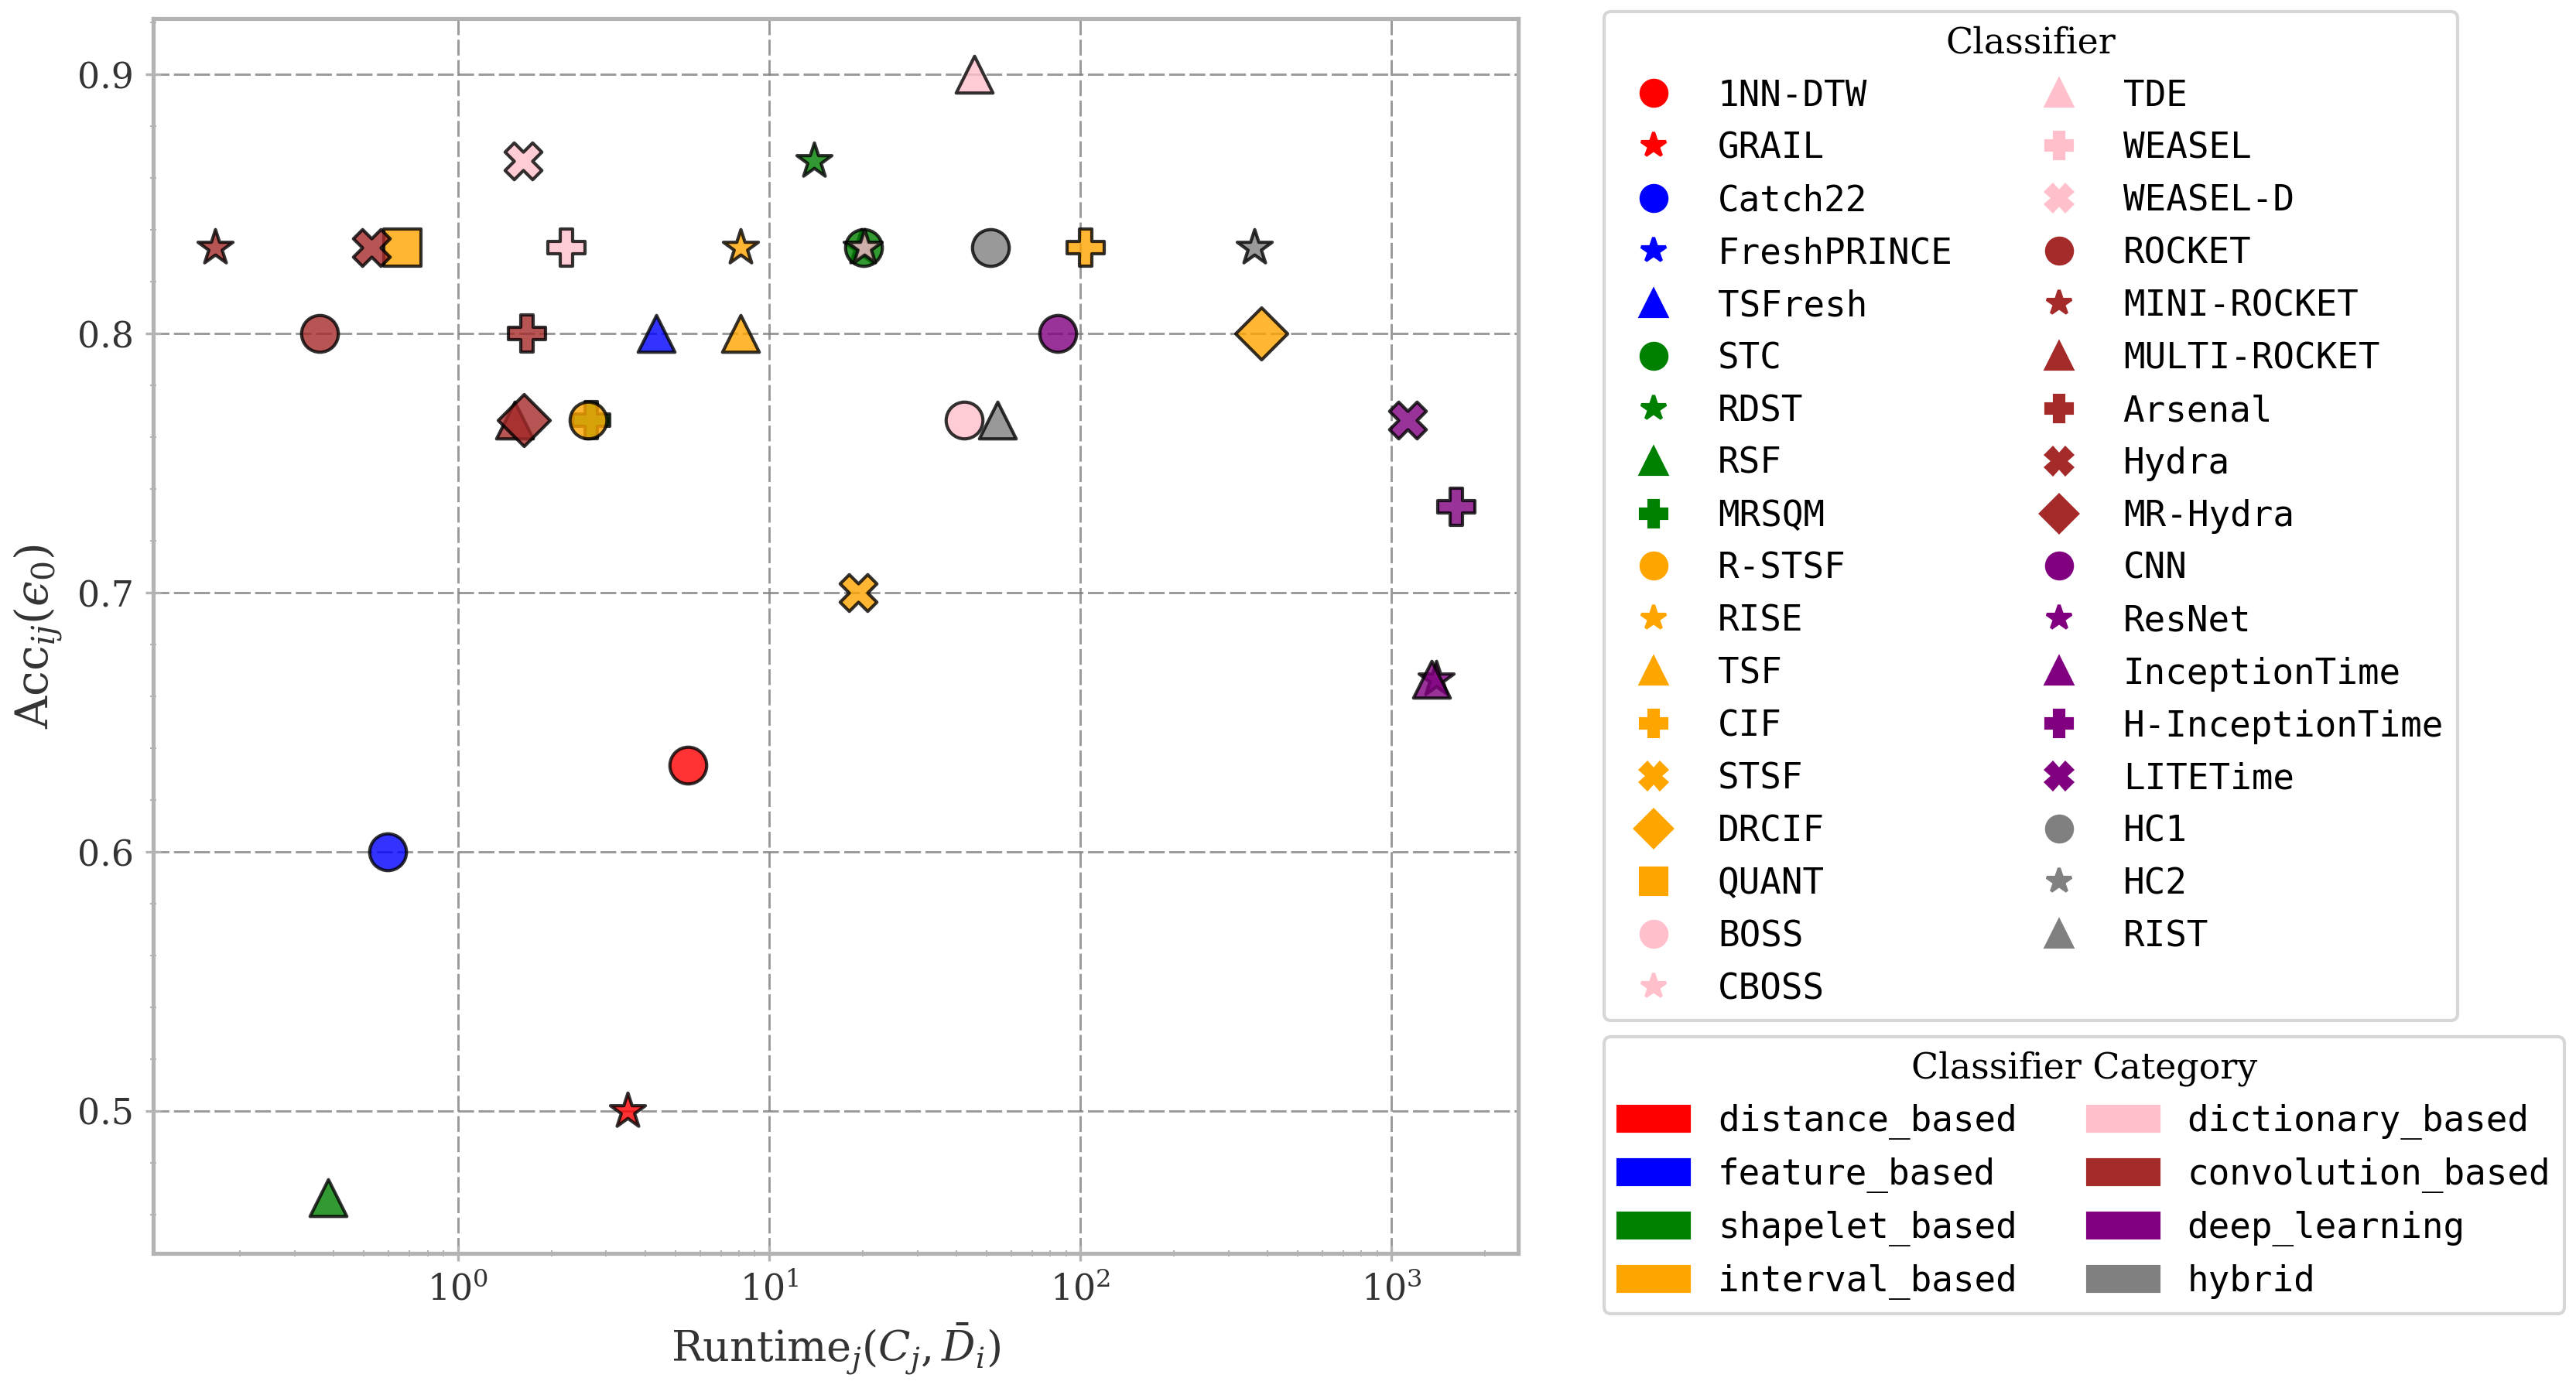

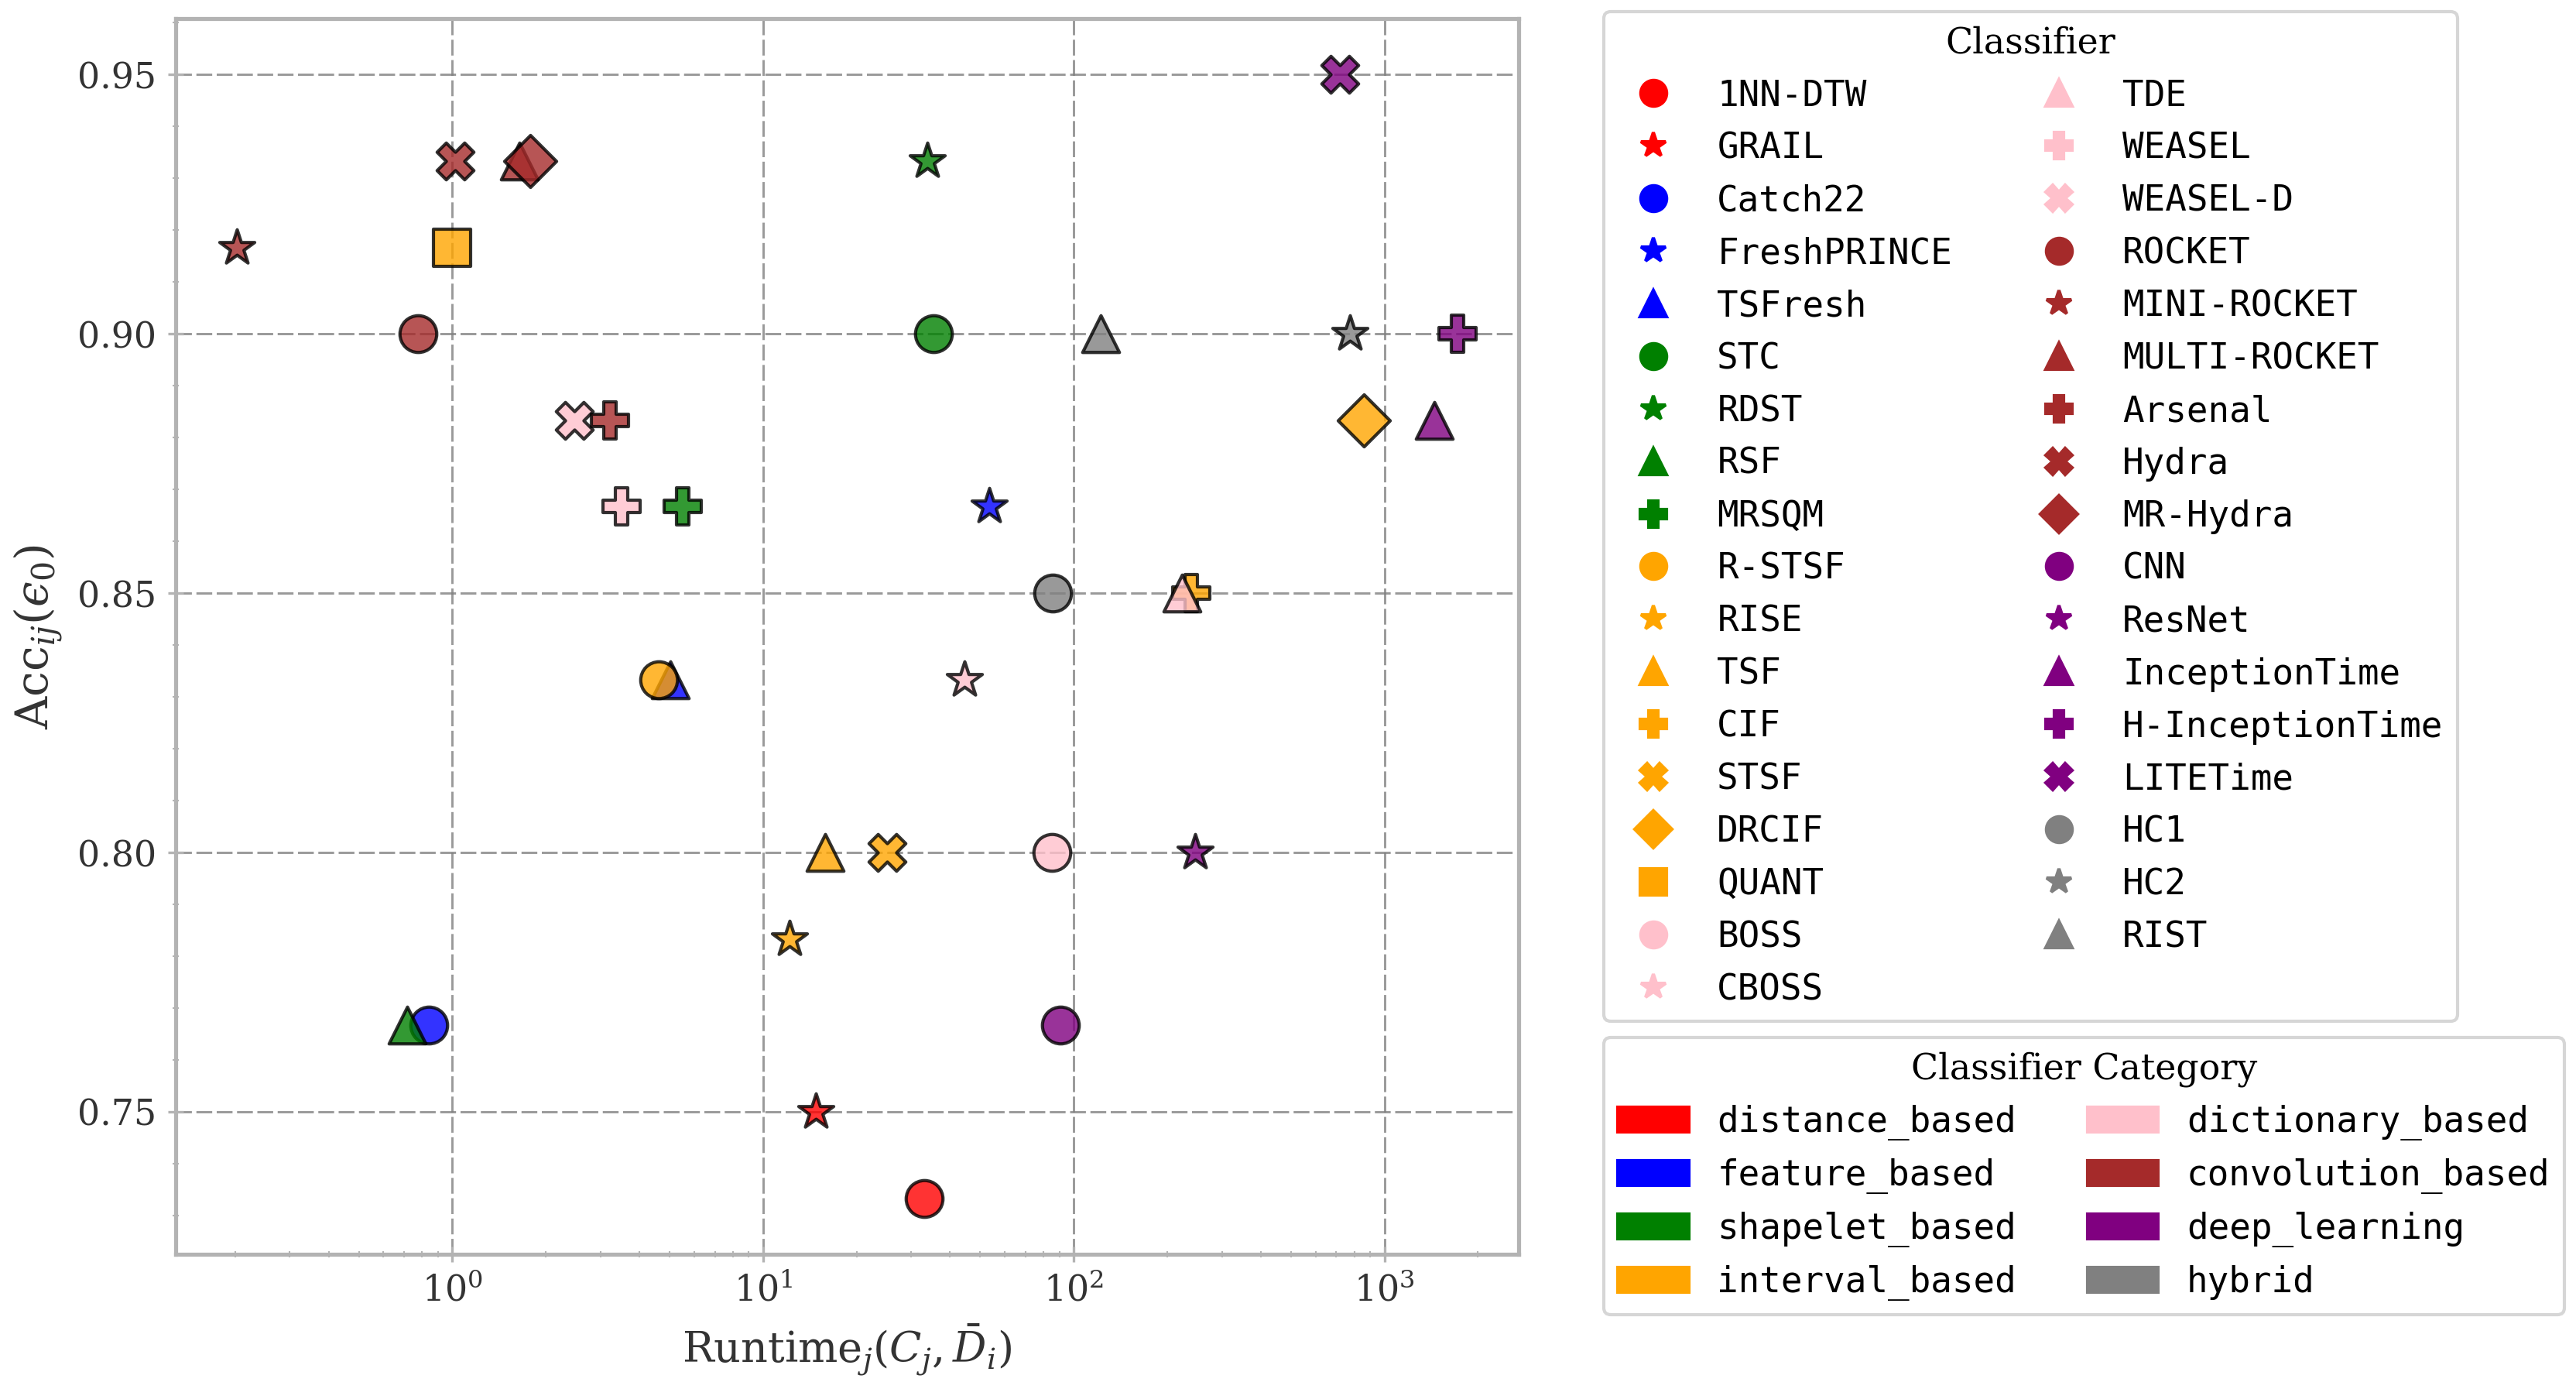

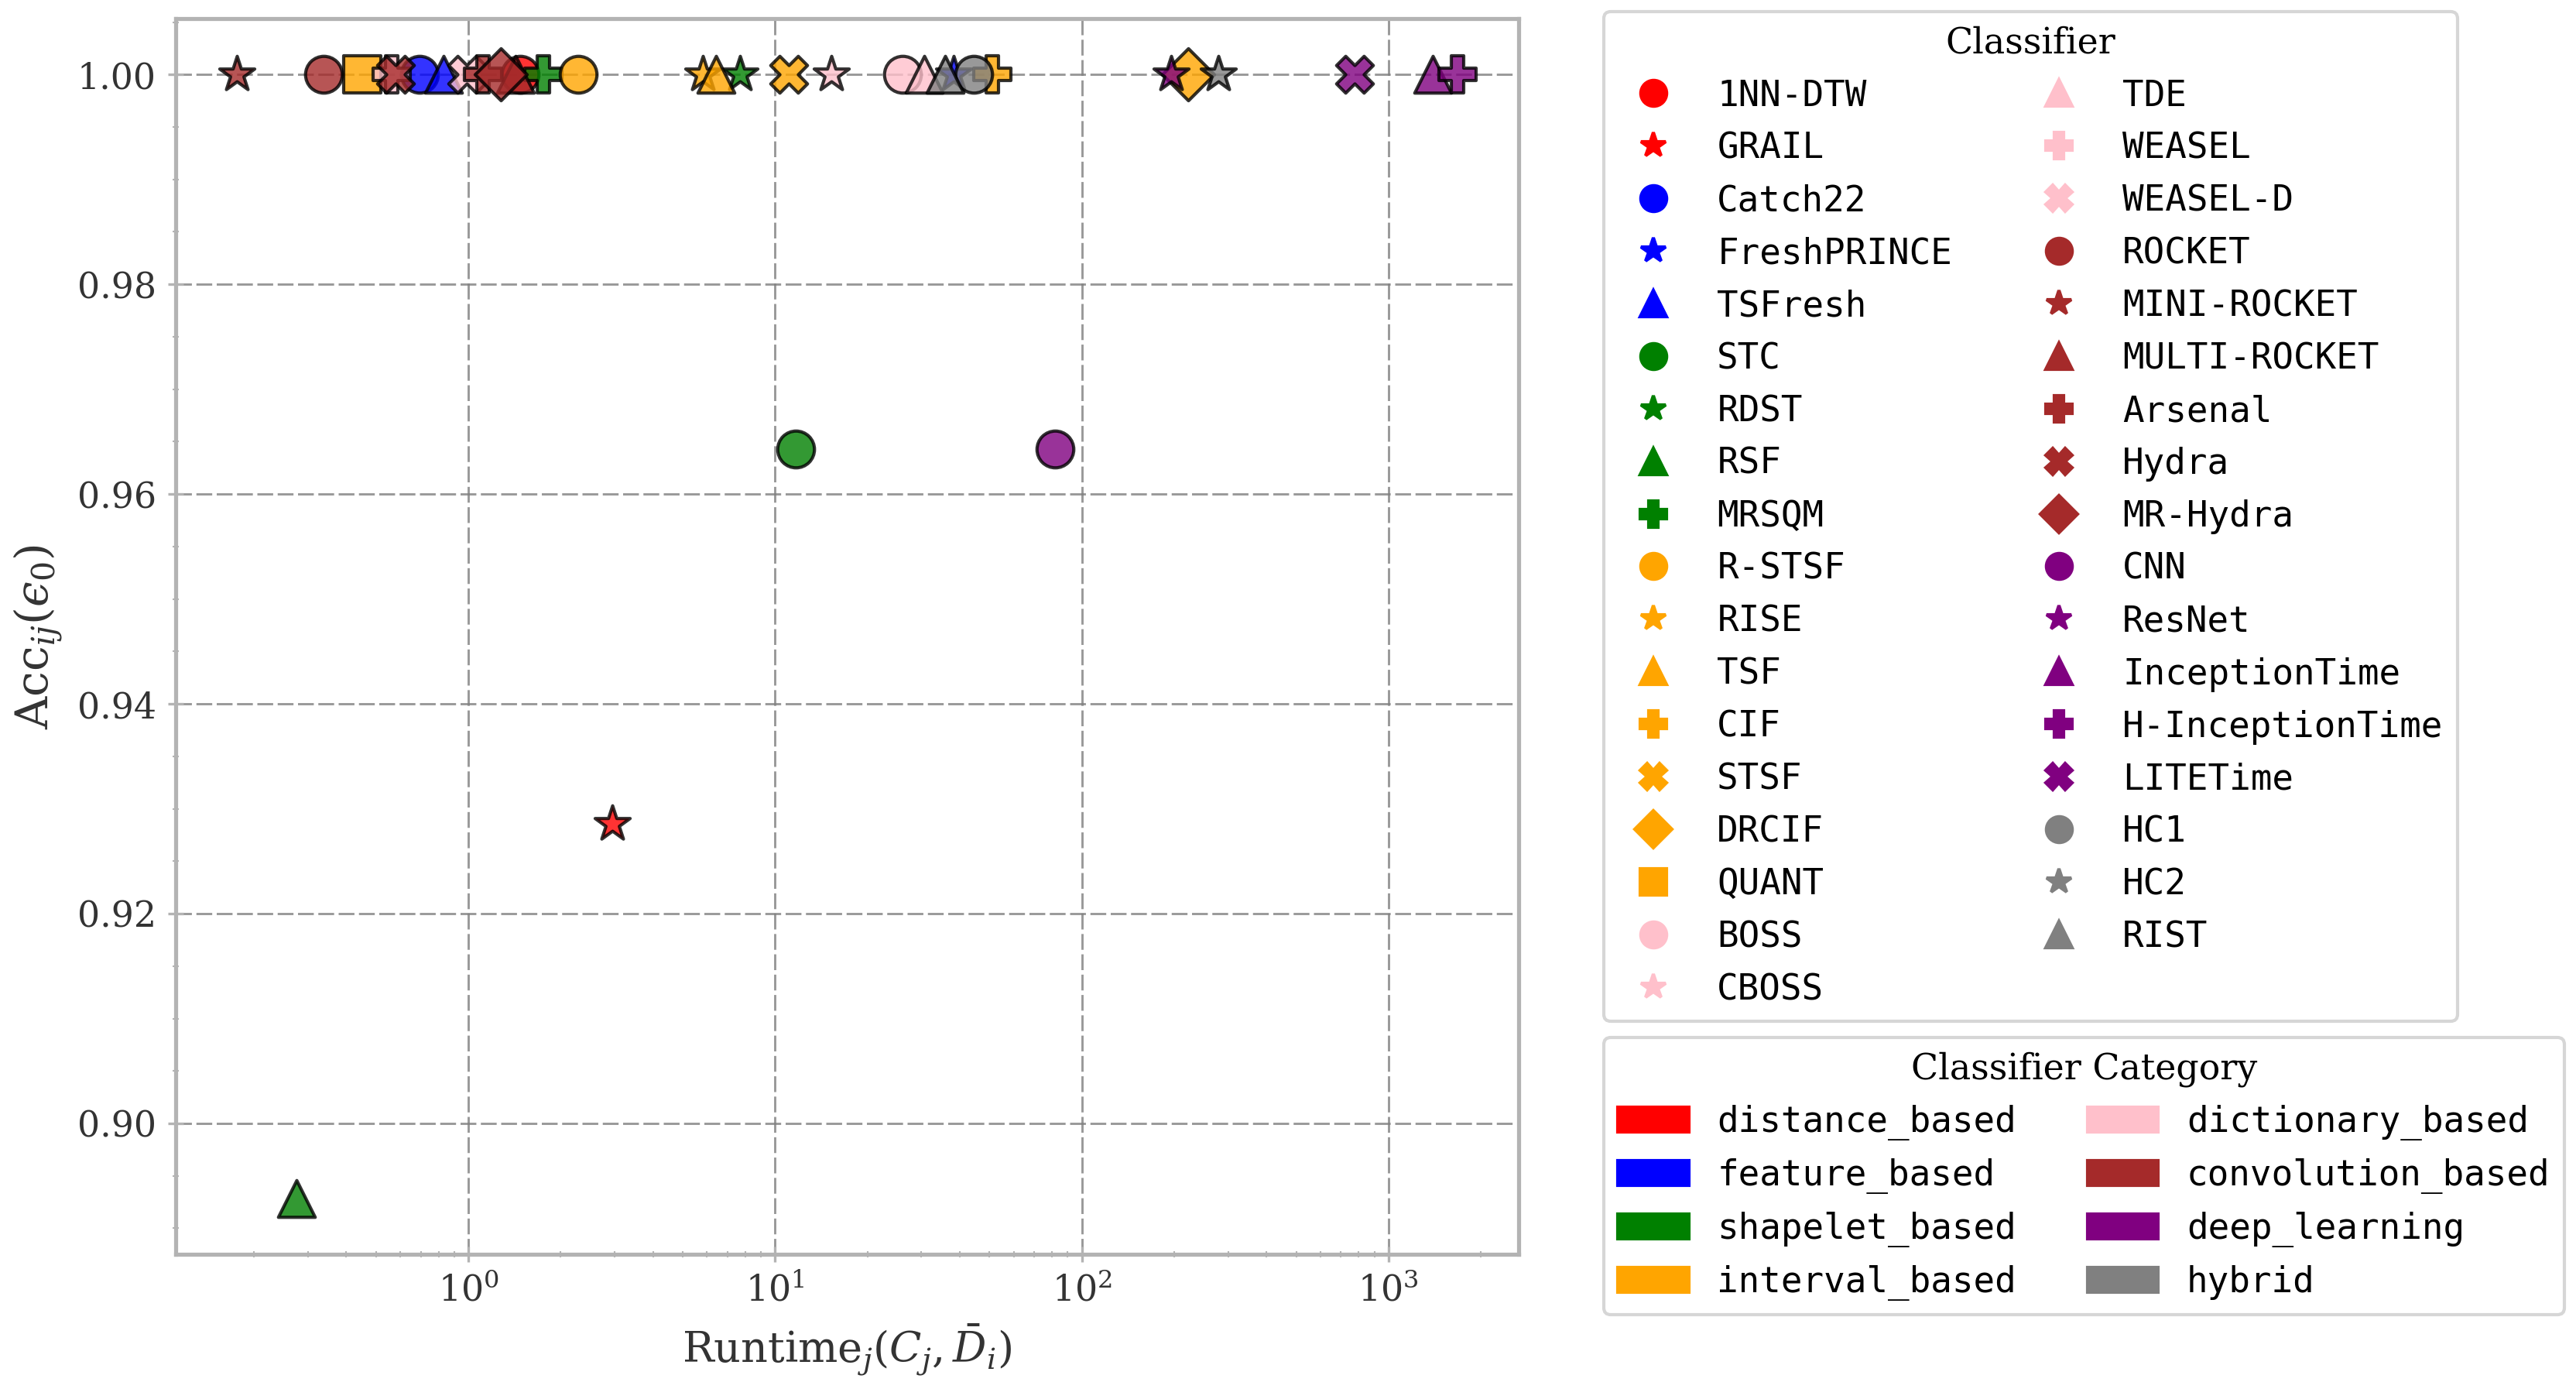

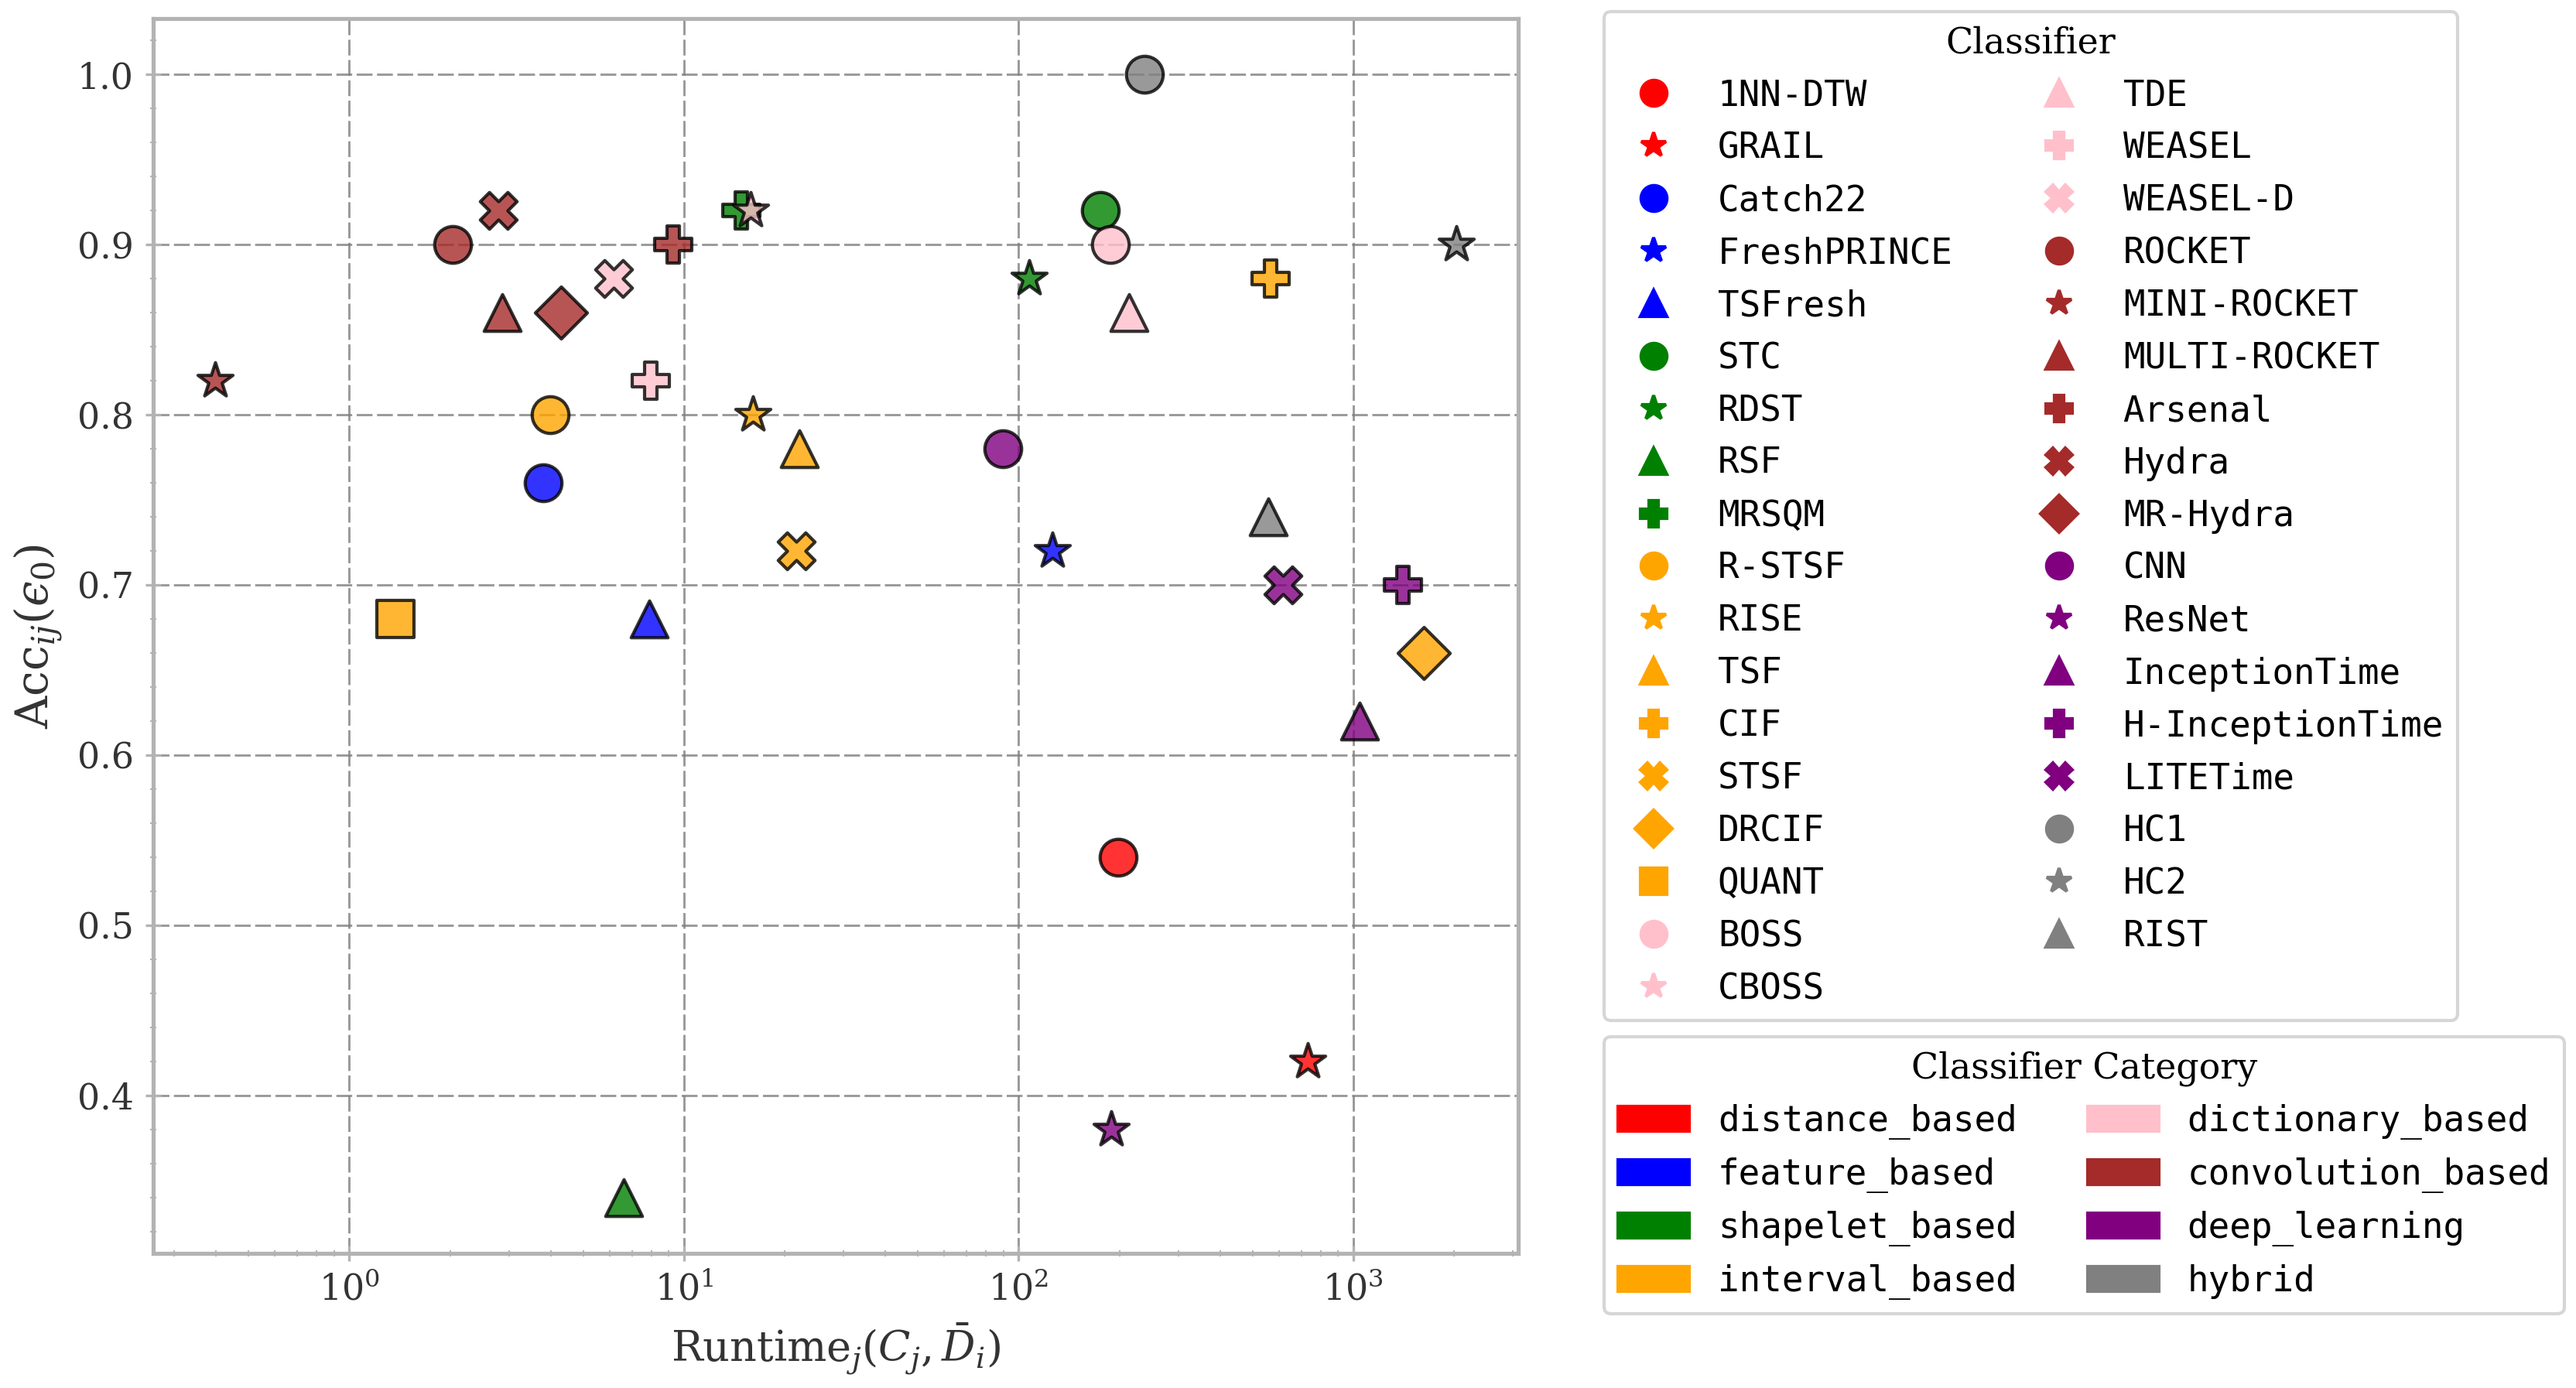

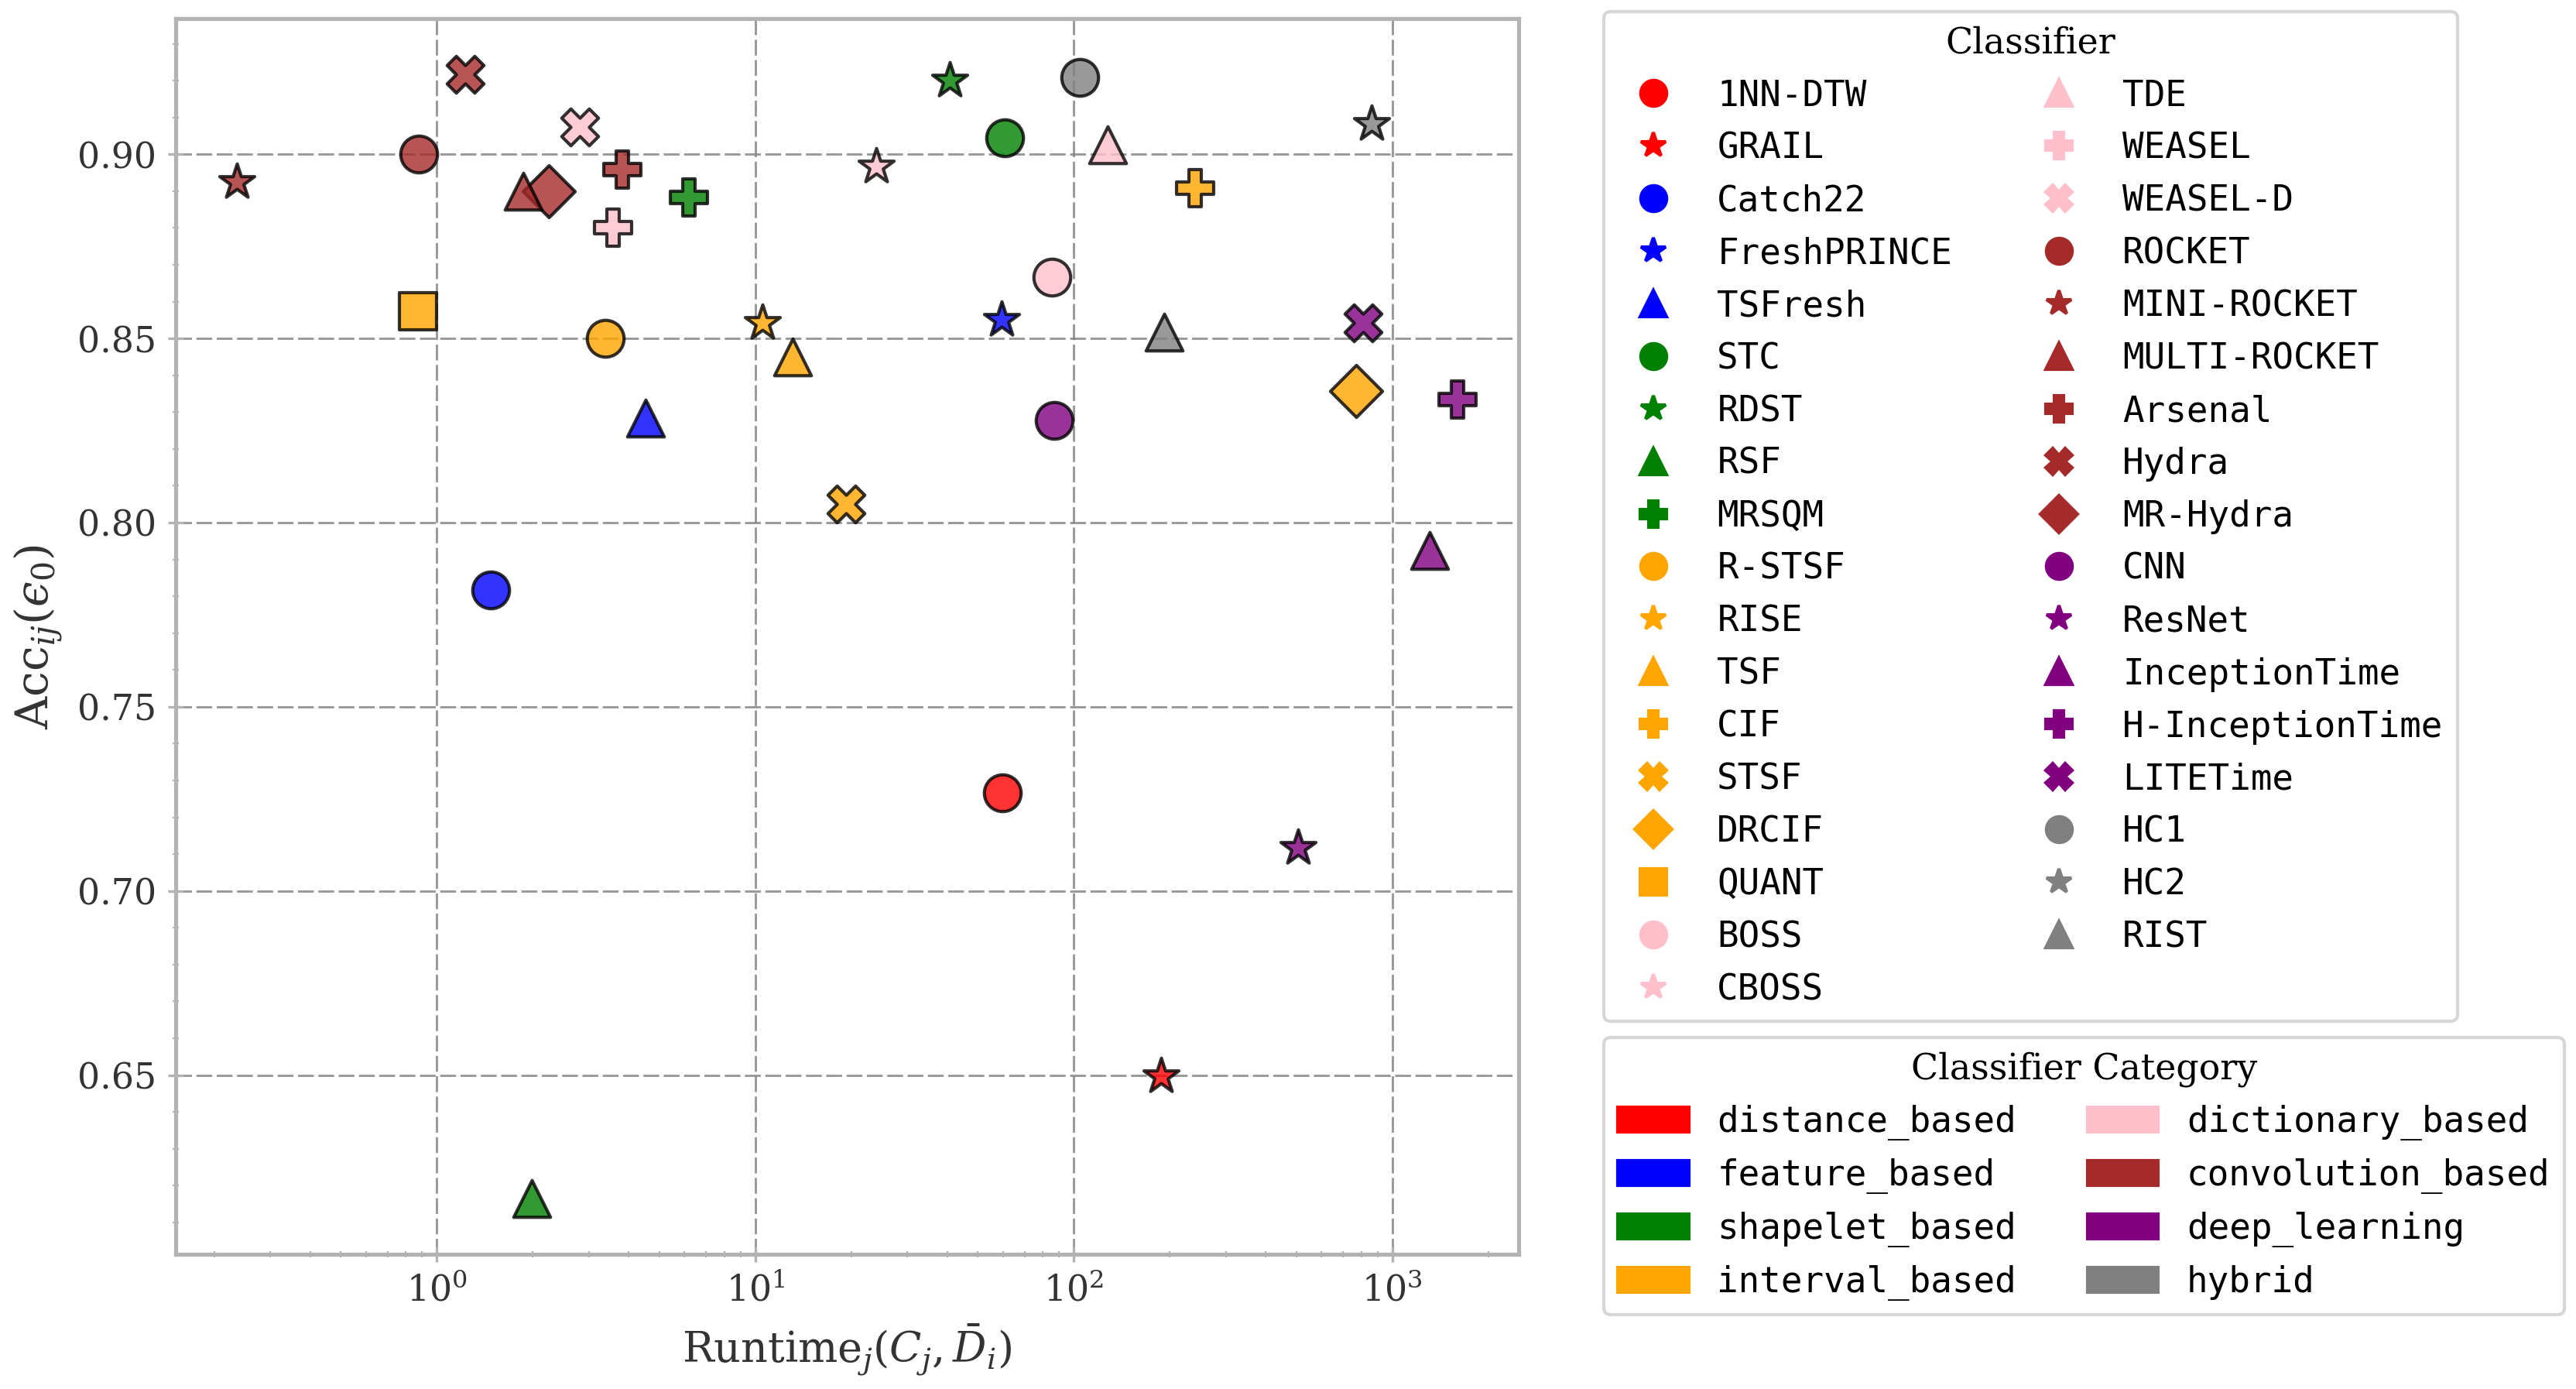

In [69]:
runtime_analysis_scatter(master_df = master_df_beef, runtime_parameter="both")
runtime_analysis_scatter(master_df= master_df_car, runtime_parameter="both")
runtime_analysis_scatter(master_df= master_df_coffee, runtime_parameter="both")
runtime_analysis_scatter(master_df=master_df_rock, runtime_parameter="both")
runtime_analysis_scatter(master_df = master_df_all, runtime_parameter="both", savefig=True)